数据预处理

数据质量：缺失值处理、异常处理、重复数据

数据结构：格式转化、数据合并

1. 删除重复数据，并输出去重前后的数据量

2. 缺失值处理

首先，去掉 gravatar_id 列，并查看各列的缺失值的情况

其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......

最后，再次看各列有无缺失值

3. 数据变换，将created_at、updated_at转为时间戳

In [2]:
import pandas as pd

file_path = 'D:/github_bot_raw_data.csv'
raw_data = pd.read_csv(file_path)
columns = [
    'actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'gravatar_id', 'url',
    'html_url', 'followers_url', 'following_url', 'gists_url', 'starred_url',
    'subscriptions_url', 'organizations_url', 'repos_url', 'events_url',
    'received_events_url', 'type', 'site_admin', 'name', 'company', 'blog',
    'location', 'email', 'hireable', 'bio', 'twitter_username', 'public_repos',
    'public_gists', 'followers', 'following', 'created_at', 'updated_at'
]

data = raw_data[columns]

# 1. 删除重复数据，并输出去重前后的数据量
print(f"去重前的数据量: {len(data)}")
data.drop_duplicates(inplace=True)
print(f"去重后的数据量: {len(data)}")

# 2. 缺失值处理
# 首先，去掉 gravatar_id 列
if 'gravatar_id' in data.columns:
    data.drop(columns=['gravatar_id'], inplace=True)

# 查看各列的缺失值情况
missing_values_before = data.isnull().sum()
print("删除 gravatar_id 列后，各列的缺失值情况：\n", missing_values_before)

# 将可转化成 boolean 变量的列字段转化成 boolean 变量
boolean_columns = ['company', 'location', 'email', 'hireable', 'bio', 'twitter_username']
for col in boolean_columns:
    if col in data.columns:
        if data[col].dtype != bool:
            data[col] = ~data[col].isnull()

text_columns = data.select_dtypes(include=[object]).columns.tolist()
data[text_columns] = data[text_columns].fillna('')

missing_values_after = data.isnull().sum()
print("处理缺失值后，各列的缺失值情况：\n", missing_values_after)

# 3. 数据变换，将 created_at、updated_at 转为时间戳
time_columns = ['created_at', 'updated_at']

for col in time_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')
        data[col + '_timestamp'] = data[col].view('int64') // 10**9
print("转换后的数据样本：\n", data[['created_at', 'created_at_timestamp', 'updated_at', 'updated_at_timestamp']].head())

output_file_path = 'D:/cleaned_github_bot_data.csv'
data.to_csv(output_file_path, index=False)
print(f"已将处理后的数据保存到 {output_file_path}")

去重前的数据量: 20358
去重后的数据量: 19779
删除 gravatar_id 列后，各列的缺失值情况：
 actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at   

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17920\3928174087.py:49: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data[col + '_timestamp'] = data[col].view('int64') // 10**9
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17920\3928174087.py:49: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data[col + '_timestamp'] = data[col].view('int64') // 10**9


转换后的数据样本：
                  created_at  created_at_timestamp                updated_at  \
0 2011-09-26 17:27:03+00:00            1317058023 2023-10-13 11:21:10+00:00   
1 2015-06-29 10:12:46+00:00            1435572766 2023-10-07 06:26:14+00:00   
2 2008-08-29 16:20:03+00:00            1220026803 2023-10-02 02:11:21+00:00   
3 2014-05-20 18:43:09+00:00            1400611389 2023-10-12 12:54:59+00:00   
4 2012-08-16 14:19:13+00:00            1345126753 2023-10-06 11:58:41+00:00   

   updated_at_timestamp  
0            1697196070  
1            1696659974  
2            1696212681  
3            1697115299  
4            1696593521  
已将处理后的数据保存到 D:/cleaned_github_bot_data.csv


4. 数据可视化

4.1 可视化bot和human类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

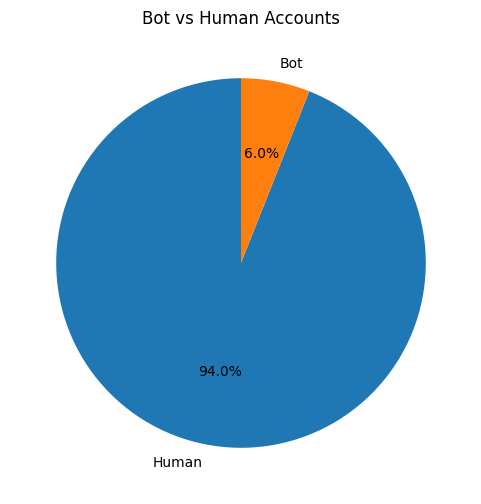

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/cleaned_github_bot_data.csv'
data = pd.read_csv(file_path)

label_counts = data['label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Bot vs Human Accounts')
plt.show()

饼图展示了 bot 和 human 账号的比例，有助于理解两者在数据集中的分布情况。显然human占大多数。

4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）



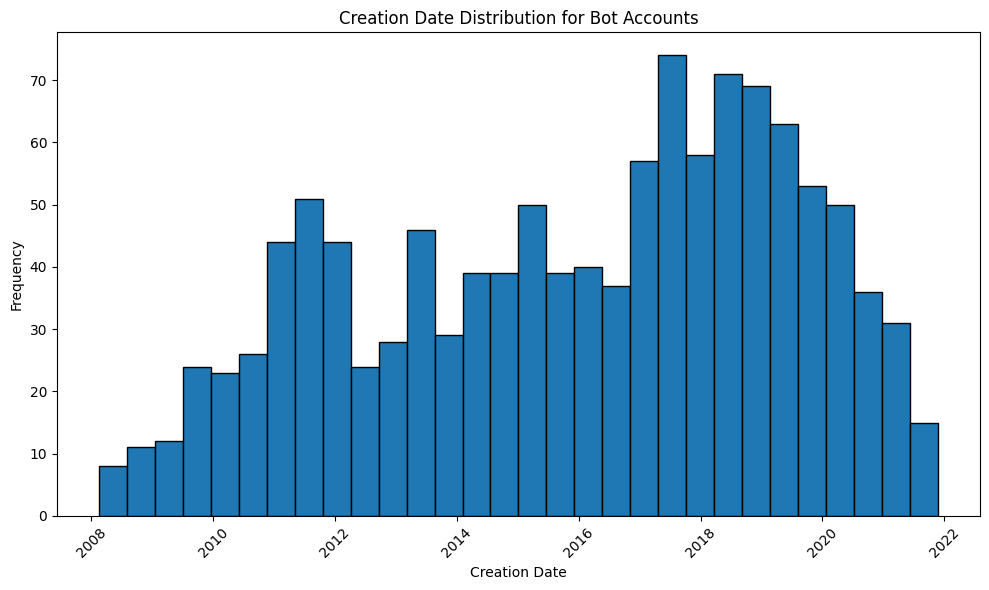

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/cleaned_github_bot_data.csv'
data = pd.read_csv(file_path)
bot_data = data[data['label'] == 'Bot']

plt.figure(figsize=(10, 6))
plt.hist(pd.to_datetime(bot_data['created_at']), bins=30, edgecolor='black')
plt.title('Creation Date Distribution for Bot Accounts')
plt.xlabel('Creation Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

直方图可以帮助识别 bot 账号创建的高峰时期。显然17-20年为账号创建高峰。

4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）



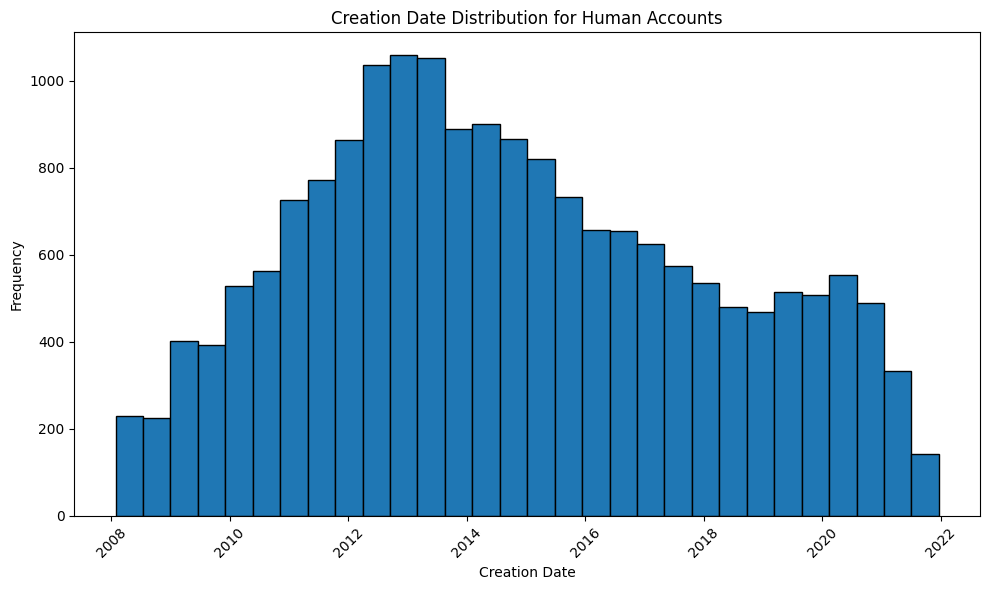

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/cleaned_github_bot_data.csv'
data = pd.read_csv(file_path)
human_data = data[data['label'] == 'Human']

plt.figure(figsize=(10, 6))
plt.hist(pd.to_datetime(human_data['created_at']), bins=30, edgecolor='black')
plt.title('Creation Date Distribution for Human Accounts')
plt.xlabel('Creation Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

直方图可以帮助识别 bot 账号创建的高峰时期。显然11-15年为创建高峰。与bot进行对比，human创建高时bot创建就低。

4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）



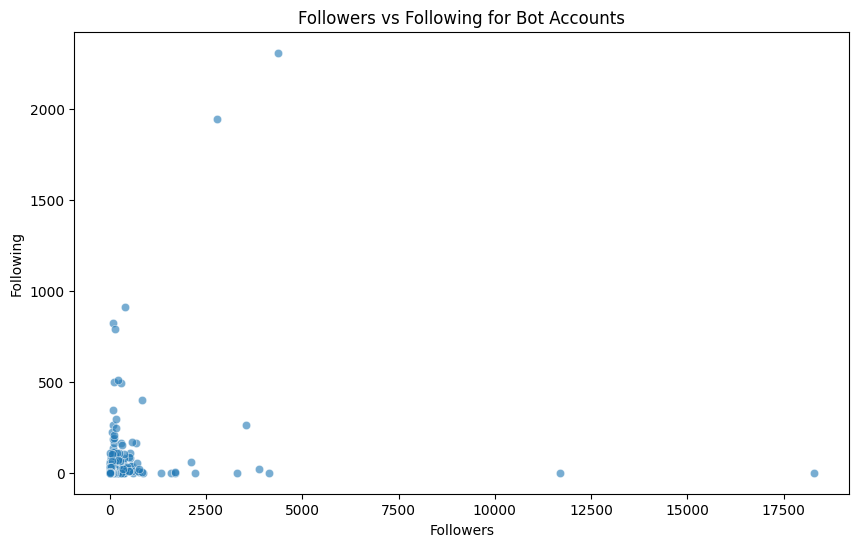

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/cleaned_github_bot_data.csv'
data = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='following', data=bot_data, alpha=0.6)
plt.title('Followers vs Following for Bot Accounts')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

散点图可以显示两个变量之间的关系，可以帮助识别 bot 账号的社交网络特征，例如是否存在大量的互相关注行为。

4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

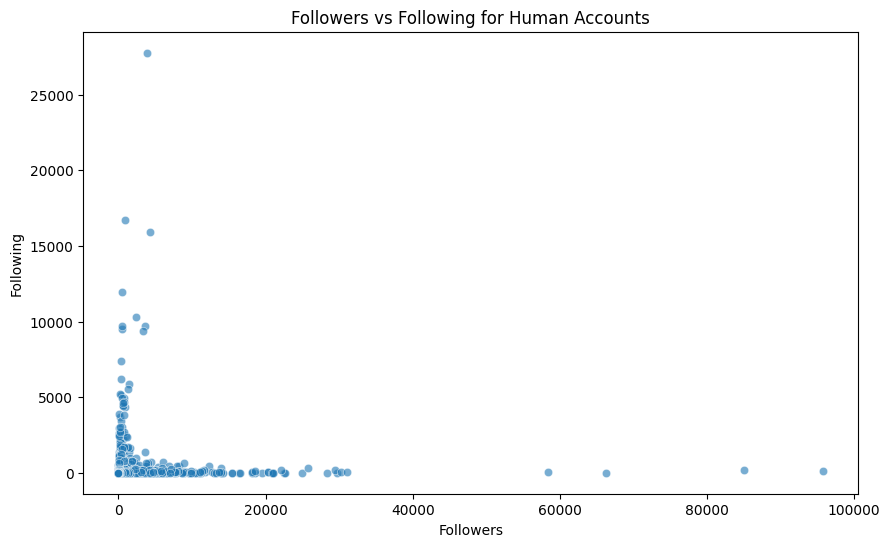

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/cleaned_github_bot_data.csv'
data = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='following', data=human_data, alpha=0.6)
plt.title('Followers vs Following for Human Accounts')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

散点图可以显示两个变量之间的关系，可以帮助识别 human 账号的社交网络特征，例如是否存在大量的互相关注行为。